<h2>ETL for airbnb dataset</h2>

In [1]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession, SQLContext

In [2]:
from pyspark.sql.types import IntegerType, DoubleType
import pyspark.sql.functions as F

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Start spark session
# We have some config options, for now I leave it default

spark = SparkSession.builder\
            .master('local')\
            .appName('Air BnB Rental Price')\
            .config('spark.some.config.option', 'some-value')\
            .getOrCreate()

In [4]:
# import dataset
filePath = 'data/sf-airbnb/sf-airbnb.csv'

# We have double quotes in our data field so use this : option('escape', '\""') 
# To enable multiline : option('multiline', 'true')
# We can ignore commas in quotes : .csv(filePath, quote='"')

airbnbDF = spark.read.options(header=True).option('escape', '\"').option('multiline', 'true')\
            .csv(filePath, quote='\"')

airbnbDF.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

In [5]:
# size of dataset
airbnbDF.select('id').count()

7151

In [6]:
# number of columns

len(airbnbDF.columns)

106

In [7]:
airbnbDF.select('id').show(5)

+----+
|  id|
+----+
| 958|
|5858|
|7918|
|8142|
|8339|
+----+
only showing top 5 rows



In [8]:
airbnbDF.select('scrape_id').distinct().show()

+--------------+
|     scrape_id|
+--------------+
|20190306152813|
+--------------+



In [9]:
airbnbDF.select('last_scraped').distinct().show()

+------------+
|last_scraped|
+------------+
|  2019-03-06|
+------------+



In [10]:
# We can delete 'scrape_id' and 'last_scraped' columns

In [11]:
airbnbDF.select('name').show(5)

+--------------------+
|                name|
+--------------------+
|Bright, Modern Ga...|
|  Creative Sanctuary|
|A Friendly Room -...|
|Friendly Room Apt...|
|Historic Alamo Sq...|
+--------------------+
only showing top 5 rows



In [12]:
airbnbDF.select('summary').show(5)

+--------------------+
|             summary|
+--------------------+
|New update: the h...|
|                null|
|Nice and good pub...|
|Nice and good pub...|
|Pls email before ...|
+--------------------+
only showing top 5 rows



In [13]:
airbnbDF.select('space').show(5)

+--------------------+
|               space|
+--------------------+
|Newly remodeled, ...|
|We live in a larg...|
|Room rental-sunny...|
|Room rental Sunny...|
|Please send us a ...|
+--------------------+
only showing top 5 rows



In [14]:
airbnbDF.select('description').show(5)

+--------------------+
|         description|
+--------------------+
|New update: the h...|
|We live in a larg...|
|Nice and good pub...|
|Nice and good pub...|
|Pls email before ...|
+--------------------+
only showing top 5 rows



In [15]:
# No experiences were offered
# we can delete this column

airbnbDF.select('experiences_offered').distinct().show()

+-------------------+
|experiences_offered|
+-------------------+
|               none|
+-------------------+



In [16]:
airbnbDF.select('neighborhood_overview').show(5)

+---------------------+
|neighborhood_overview|
+---------------------+
| *Quiet cul de sac...|
| I love how our ne...|
| Shopping old town...|
|                 null|
|                 null|
+---------------------+
only showing top 5 rows



In [17]:
airbnbDF.select('notes').show(5, False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|notes                                                                                                                                                                                                                                          |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Due to the fact that we have children and a dog, we are up early 7-8am and their footsteps or paws can be heard from the apartment. Our place is ideal for early risers or hard sleepers who appreciate quiet evenings more than late mornings.|
|All the furniture in the house 

In [18]:
airbnbDF.select('transit').show(5, False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|transit                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [19]:
airbnbDF.select('access').show(5, False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|access                                                                                                                                                                                         |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|*Full access to patio and backyard (shared with us and our dog who live upstairs) *Beautiful garden with fruit trees, native plants and lawn *Washer and dryer *Children's toys *Charcoal grill|
|Our deck, garden, gourmet kitchen and extensive art, design and literature library.                                                                                                            |
|null                         

In [20]:
# Too many null values, I won't keep this column

airbnbDF.select('interaction').where(F.col('interaction').isNull()).count()

2291

In [21]:
airbnbDF.select('house_rules').show(5)

+--------------------+
|         house_rules|
+--------------------+
|* No Pets - even ...|
|Please respect th...|
|No party, No smok...|
|no pet no smoke n...|
|House Manual and ...|
+--------------------+
only showing top 5 rows



In [22]:
# We do not need this column
airbnbDF.select('thumbnail_url').distinct().show()

+-------------+
|thumbnail_url|
+-------------+
|         null|
+-------------+



In [23]:
# We do not need this column
airbnbDF.select('medium_url').distinct().show()

+----------+
|medium_url|
+----------+
|      null|
+----------+



In [24]:
# For now, I will remove this column

airbnbDF.select('picture_url').distinct().show(5, False)

+---------------------------------------------------------------------------------------------+
|picture_url                                                                                  |
+---------------------------------------------------------------------------------------------+
|https://a0.muscache.com/im/pictures/7b5db254-90d6-4242-9536-47af9d1caa77.jpg?aki_policy=large|
|https://a0.muscache.com/im/pictures/4938911/b36a4bd7_original.jpg?aki_policy=large           |
|https://a0.muscache.com/im/pictures/12341660/6fdbc6d9_original.jpg?aki_policy=large          |
|https://a0.muscache.com/im/pictures/11336423/723a8779_original.jpg?aki_policy=large          |
|https://a0.muscache.com/im/pictures/c80cb175-7b8c-42f3-a51d-6f0d5682d7e3.jpg?aki_policy=large|
+---------------------------------------------------------------------------------------------+
only showing top 5 rows



In [25]:
# We do not need this column
airbnbDF.select('xl_picture_url').distinct().show()

+--------------+
|xl_picture_url|
+--------------+
|          null|
+--------------+



In [26]:
airbnbDF.select('host_id').show(5)

+-------+
|host_id|
+-------+
|   1169|
|   8904|
|  21994|
|  21994|
|  24215|
+-------+
only showing top 5 rows



In [27]:
# I do not need to keep this
airbnbDF.select('host_url').show(5, False)

+---------------------------------------+
|host_url                               |
+---------------------------------------+
|https://www.airbnb.com/users/show/1169 |
|https://www.airbnb.com/users/show/8904 |
|https://www.airbnb.com/users/show/21994|
|https://www.airbnb.com/users/show/21994|
|https://www.airbnb.com/users/show/24215|
+---------------------------------------+
only showing top 5 rows



In [28]:
# I donot need this too.
airbnbDF.select('host_name').show(5)

+----------------+
|       host_name|
+----------------+
|           Holly|
|Philip And Tania|
|           Aaron|
|           Aaron|
|            Rosy|
+----------------+
only showing top 5 rows



In [29]:
# This is about experience of hosts.

airbnbDF.select('host_since').show(5)

+----------+
|host_since|
+----------+
|2008-07-31|
|2009-03-02|
|2009-06-17|
|2009-06-17|
|2009-07-02|
+----------+
only showing top 5 rows



In [30]:
# I do not need this
airbnbDF.select('host_location').show(5, False)

+----------------------------------------+
|host_location                           |
+----------------------------------------+
|San Francisco, California, United States|
|San Francisco, California, United States|
|San Francisco, California, United States|
|San Francisco, California, United States|
|San Francisco, California, United States|
+----------------------------------------+
only showing top 5 rows



In [31]:
# I won't keep this for now.

airbnbDF.select('host_about').show(5)

+--------------------+
|          host_about|
+--------------------+
|We are a family w...|
|Philip: English t...|
|7 minutes walk to...|
|7 minutes walk to...|
|Always searching ...|
+--------------------+
only showing top 5 rows



In [32]:
airbnbDF.groupby('host_response_time').count().show()

+------------------+-----+
|host_response_time|count|
+------------------+-----+
|a few days or more|   76|
|      within a day|  709|
|within a few hours| 1272|
|               N/A|  725|
|    within an hour| 4369|
+------------------+-----+



In [33]:
airbnbDF.select('host_response_rate').show(5)

+------------------+
|host_response_rate|
+------------------+
|              100%|
|               80%|
|              100%|
|              100%|
|              100%|
+------------------+
only showing top 5 rows



In [34]:
airbnbDF.select('host_acceptance_rate').distinct().show()

+--------------------+
|host_acceptance_rate|
+--------------------+
|                 N/A|
+--------------------+



In [35]:
##############################
# This is a interesting feature

airbnbDF.select('host_is_superhost').show(5)

+-----------------+
|host_is_superhost|
+-----------------+
|                t|
|                f|
|                f|
|                f|
|                f|
+-----------------+
only showing top 5 rows



In [36]:
# airbnbDF.select('host_neighbourhood').distinct().show(5)

In [37]:
# I will figure this out later

airbnbDF.select('host_listings_count').show(5)
airbnbDF.select('host_total_listings_count').show(5)

+-------------------+
|host_listings_count|
+-------------------+
|                  1|
|                  2|
|                 10|
|                 10|
|                  2|
+-------------------+
only showing top 5 rows

+-------------------------+
|host_total_listings_count|
+-------------------------+
|                        1|
|                        2|
|                       10|
|                       10|
|                        2|
+-------------------------+
only showing top 5 rows



In [38]:
airbnbDF.select('host_verifications').show(5, False)

+-------------------------------------------------------+
|host_verifications                                     |
+-------------------------------------------------------+
|['email', 'phone', 'facebook', 'reviews', 'kba']       |
|['email', 'phone', 'reviews', 'kba', 'work_email']     |
|['email', 'phone', 'reviews', 'jumio', 'government_id']|
|['email', 'phone', 'reviews', 'jumio', 'government_id']|
|['email', 'phone', 'reviews', 'kba']                   |
+-------------------------------------------------------+
only showing top 5 rows



In [39]:
airbnbDF.groupby('host_has_profile_pic').count().show()

+--------------------+-----+
|host_has_profile_pic|count|
+--------------------+-----+
|                   f|   29|
|                   t| 7122|
+--------------------+-----+



In [40]:
airbnbDF.groupby('host_identity_verified').count().show()

+----------------------+-----+
|host_identity_verified|count|
+----------------------+-----+
|                     f| 3078|
|                     t| 4073|
+----------------------+-----+



In [41]:
# will be deleted
airbnbDF.select('street').show(5, False)

+--------------------------------+
|street                          |
+--------------------------------+
|San Francisco, CA, United States|
|San Francisco, CA, United States|
|San Francisco, CA, United States|
|San Francisco, CA, United States|
|San Francisco, CA, United States|
+--------------------------------+
only showing top 5 rows



In [42]:
airbnbDF.select('neighbourhood').show(5, False)

+---------------------+
|neighbourhood        |
+---------------------+
|Duboce Triangle      |
|Bernal Heights       |
|Cole Valley          |
|Cole Valley          |
|Western Addition/NOPA|
+---------------------+
only showing top 5 rows



In [43]:
airbnbDF.select('neighbourhood_cleansed').show(5, False)

+----------------------+
|neighbourhood_cleansed|
+----------------------+
|Western Addition      |
|Bernal Heights        |
|Haight Ashbury        |
|Haight Ashbury        |
|Western Addition      |
+----------------------+
only showing top 5 rows



In [44]:
# Will be deleted
airbnbDF.select('neighbourhood_group_cleansed').show(5, False)

+----------------------------+
|neighbourhood_group_cleansed|
+----------------------------+
|null                        |
|null                        |
|null                        |
|null                        |
|null                        |
+----------------------------+
only showing top 5 rows



In [45]:
# This dataset only contain information about Airbnb rentals in San Francisco
# We do not need this column

airbnbDF.select('city').show(5)

+-------------+
|         city|
+-------------+
|San Francisco|
|San Francisco|
|San Francisco|
|San Francisco|
|San Francisco|
+-------------+
only showing top 5 rows



In [46]:
# will be deleted
airbnbDF.select('state').show(5, False)

+-----+
|state|
+-----+
|CA   |
|CA   |
|CA   |
|CA   |
|CA   |
+-----+
only showing top 5 rows



In [47]:
airbnbDF.select('zipcode').show(5, False)

+-------+
|zipcode|
+-------+
|94117  |
|94110  |
|94117  |
|94117  |
|94117  |
+-------+
only showing top 5 rows



In [48]:
# will be deleted
airbnbDF.select('market').distinct().show()

+-------------+
|       market|
+-------------+
|San Francisco|
|         null|
+-------------+



In [49]:
airbnbDF.select('smart_location').distinct().show()

+--------------------+
|      smart_location|
+--------------------+
|South San Francis...|
|                  CA|
|   San Francisco, CA|
|Bernal Heights, S...|
|San Francisco, Ha...|
|Noe Valley - San ...|
|   San Francisco, Ca|
|  San Francisco , CA|
|       Daly City, CA|
|San Francisco, Me...|
+--------------------+



In [50]:
'''
Country code & country : one value
latitude & longitude : not a difference in city area
'''

airbnbDF.select('country_code', 'country', 'latitude','longitude', 'is_location_exact').show(5, False)

# I don't think this is an important feature
airbnbDF.groupby('is_location_exact').count().show()

+------------+-------------+--------+----------+-----------------+
|country_code|country      |latitude|longitude |is_location_exact|
+------------+-------------+--------+----------+-----------------+
|US          |United States|37.76931|-122.43386|t                |
|US          |United States|37.74511|-122.42102|t                |
|US          |United States|37.76669|-122.4525 |t                |
|US          |United States|37.76487|-122.45183|t                |
|US          |United States|37.77525|-122.43637|t                |
+------------+-------------+--------+----------+-----------------+
only showing top 5 rows

+-----------------+-----+
|is_location_exact|count|
+-----------------+-----+
|                f| 1091|
|                t| 6060|
+-----------------+-----+



In [51]:
airbnbDF.select('property_type', 'room_type', 'accommodates').show(5, False)

airbnbDF.groupby('property_type').count().show(5)
airbnbDF.groupby('room_type').count().show()

+-------------+---------------+------------+
|property_type|room_type      |accommodates|
+-------------+---------------+------------+
|Apartment    |Entire home/apt|3           |
|Apartment    |Entire home/apt|5           |
|Apartment    |Private room   |2           |
|Apartment    |Private room   |2           |
|House        |Entire home/apt|5           |
+-------------+---------------+------------+
only showing top 5 rows

+-------------+-----+
|property_type|count|
+-------------+-----+
|    Apartment| 3013|
|    Townhouse|  140|
|       Resort|    8|
|  Guest suite|  496|
|    Timeshare|    1|
+-------------+-----+
only showing top 5 rows

+---------------+-----+
|      room_type|count|
+---------------+-----+
|    Shared room|  179|
|Entire home/apt| 4366|
|   Private room| 2606|
+---------------+-----+



In [52]:
airbnbDF.select('bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities').show(5)

# The most of beds are real bed, I will remove it
airbnbDF.groupby('bed_type').count().show()

+---------+--------+----+--------+--------------------+
|bathrooms|bedrooms|beds|bed_type|           amenities|
+---------+--------+----+--------+--------------------+
|        1|       1|   2|Real Bed|{TV,"Cable TV",In...|
|        1|       2|   3|Real Bed|{Internet,Wifi,Ki...|
|        4|       1|   1|Real Bed|{TV,Internet,Wifi...|
|        4|       1|   1|Real Bed|{TV,Internet,Wifi...|
|      1.5|       2|   2|Real Bed|{TV,Internet,Wifi...|
+---------+--------+----+--------+--------------------+
only showing top 5 rows

+-------------+-----+
|     bed_type|count|
+-------------+-----+
|       Airbed|   11|
|        Futon|   32|
|Pull-out Sofa|   23|
|        Couch|    7|
|     Real Bed| 7078|
+-------------+-----+



In [53]:
airbnbDF.select('square_feet', 'price','weekly_price', 'monthly_price', 'security_deposit').show(5)

# The most of values are null, we do not need it.
airbnbDF.groupby('square_feet').count().show()

+-----------+-------+------------+-------------+----------------+
|square_feet|  price|weekly_price|monthly_price|security_deposit|
+-----------+-------+------------+-------------+----------------+
|       null|$170.00|   $1,120.00|    $4,200.00|         $100.00|
|       null|$235.00|   $1,600.00|    $5,500.00|            null|
|       null| $65.00|     $485.00|    $1,685.00|         $200.00|
|       null| $65.00|     $490.00|    $1,685.00|         $200.00|
|       null|$785.00|        null|         null|           $0.00|
+-----------+-------+------------+-------------+----------------+
only showing top 5 rows

+-----------+-----+
|square_feet|count|
+-----------+-----+
|        800|    4|
|        853|    1|
|       2700|    1|
|       1500|    5|
|       2200|    2|
|        700|    3|
|       1100|    1|
|        890|    1|
|       1300|    1|
|        250|    2|
|       2100|    3|
|        160|    1|
|       2000|    3|
|          0|    2|
|        195|    1|
|       null| 7025|
|

In [54]:
airbnbDF.select('cleaning_fee', 'guests_included', 'extra_people').show(5)

+------------+---------------+------------+
|cleaning_fee|guests_included|extra_people|
+------------+---------------+------------+
|     $100.00|              2|      $25.00|
|     $100.00|              2|       $0.00|
|      $50.00|              1|      $12.00|
|      $50.00|              1|      $12.00|
|     $225.00|              2|     $150.00|
+------------+---------------+------------+
only showing top 5 rows



In [55]:
airbnbDF.select('minimum_nights', 'maximum_nights', 'minimum_minimum_nights').show()

+--------------+--------------+----------------------+
|minimum_nights|maximum_nights|minimum_minimum_nights|
+--------------+--------------+----------------------+
|             1|            30|                     1|
|            30|            60|                    30|
|            32|            60|                    32|
|            32|            90|                    32|
|             7|          1125|                     7|
|             2|           365|                     2|
|             1|            14|                     1|
|             1|           365|                     1|
|             3|            30|                     3|
|            30|          1125|                    30|
|            30|          1125|                    30|
|            30|           365|                    30|
|            32|            60|                    32|
|            32|            90|                    32|
|             3|            27|                     3|
|         

In [56]:
airbnbDF.select('calendar_updated', 'has_availability', 'calendar_last_scraped').show(5)

+----------------+----------------+---------------------+
|calendar_updated|has_availability|calendar_last_scraped|
+----------------+----------------+---------------------+
|           today|               t|           2019-03-06|
|    3 months ago|               t|           2019-03-06|
|   16 months ago|               t|           2019-03-06|
|   16 months ago|               t|           2019-03-06|
|    3 months ago|               t|           2019-03-06|
+----------------+----------------+---------------------+
only showing top 5 rows



In [57]:
airbnbDF.select('number_of_reviews', 'number_of_reviews_ltm').show(5)

+-----------------+---------------------+
|number_of_reviews|number_of_reviews_ltm|
+-----------------+---------------------+
|              180|                   52|
|              111|                    0|
|               17|                    0|
|                8|                    1|
|               27|                    1|
+-----------------+---------------------+
only showing top 5 rows



In [58]:
airbnbDF.select('first_review', 'last_review', 'review_scores_rating', 
                'review_scores_checkin','review_scores_accuracy').show(5)

+------------+-----------+--------------------+---------------------+----------------------+
|first_review|last_review|review_scores_rating|review_scores_checkin|review_scores_accuracy|
+------------+-----------+--------------------+---------------------+----------------------+
|  2009-07-23| 2019-02-17|                  97|                   10|                    10|
|  2009-05-03| 2017-08-06|                  98|                   10|                    10|
|  2009-08-31| 2016-11-21|                  85|                    9|                     8|
|  2014-09-08| 2018-09-12|                  93|                   10|                     9|
|  2009-09-25| 2018-08-11|                  97|                   10|                    10|
+------------+-----------+--------------------+---------------------+----------------------+
only showing top 5 rows



In [59]:
airbnbDF.select('requires_license', 'license', 'jurisdiction_names', 'instant_bookable').show(5)

+----------------+-----------+------------------+----------------+
|requires_license|    license|jurisdiction_names|instant_bookable|
+----------------+-----------+------------------+----------------+
|               t|STR-0001256| {"SAN FRANCISCO"}|               t|
|               t|       null| {"SAN FRANCISCO"}|               f|
|               t|       null| {"SAN FRANCISCO"}|               f|
|               t|       null| {"SAN FRANCISCO"}|               f|
|               t|STR-0000264| {"SAN FRANCISCO"}|               f|
+----------------+-----------+------------------+----------------+
only showing top 5 rows



In [60]:
airbnbDF.select('is_business_travel_ready').distinct().show()

+------------------------+
|is_business_travel_ready|
+------------------------+
|                       f|
+------------------------+



In [61]:
airbnbDF.select('cancellation_policy', 'require_guest_profile_picture',
               'require_guest_phone_verification').show(5)

+--------------------+-----------------------------+--------------------------------+
| cancellation_policy|require_guest_profile_picture|require_guest_phone_verification|
+--------------------+-----------------------------+--------------------------------+
|            moderate|                            f|                               f|
|strict_14_with_gr...|                            f|                               f|
|strict_14_with_gr...|                            f|                               f|
|strict_14_with_gr...|                            f|                               f|
|strict_14_with_gr...|                            t|                               t|
+--------------------+-----------------------------+--------------------------------+
only showing top 5 rows



In [62]:
airbnbDF.select('calculated_host_listings_count').show(5)

+------------------------------+
|calculated_host_listings_count|
+------------------------------+
|                             1|
|                             1|
|                             9|
|                             9|
|                             2|
+------------------------------+
only showing top 5 rows



In [63]:
airbnbDF.select('reviews_per_month').show(5)

+-----------------+
|reviews_per_month|
+-----------------+
|             1.54|
|             0.93|
|             0.15|
|             0.15|
|             0.23|
+-----------------+
only showing top 5 rows



In [64]:
col_removed = ['id','last_scraped', 'name','listing_url', 'scrape_id', 'experiences_offered', 'notes','interaction' 
               , 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url','host_id' ,'host_url', 'host_name'
               , 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url','host_listings_count'
               , 'host_picture_url', 'street', 'neighbourhood_group_cleansed', 'neighbourhood'
               , 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude','longitude'
               , 'is_location_exact', 'bed_type', 'square_feet' ,'weekly_price', 'monthly_price'
               , 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights'
              , 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm'
              , 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability'
              , 'availability_30', 'availability_60', 'availability_90', 'availability_365'
              , 'first_review', 'last_review', 'requires_license', 'jurisdiction_names'
              , 'is_business_travel_ready','calendar_last_scraped'
              , 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'
              , 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [65]:
cleaned_df =airbnbDF.drop(*col_removed) 

In [66]:
cleaned_df.printSchema()

root
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_neighbourhood: string (nullable = true)
 |-- host_total_listings_count: string (nullable = true)
 |-- host_verifications: string (nullable = true)
 |-- host_has_profile_pic: string (nullable = true)
 |-- host_identity_verified: string (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: string (nullable = true)
 |-- bathrooms: string (nu

<h2>Play with some columns</h2>

In [67]:
airbnbDF.select('price').show(5)

+-------+
|  price|
+-------+
|$170.00|
|$235.00|
| $65.00|
| $65.00|
|$785.00|
+-------+
only showing top 5 rows



In [68]:
def remove_dollar(row):
    
    '''
    input : string , e.g. $170.00
    output : double, e.g. 170.00
    '''
    
    new_string = row[1:]
    
    return float(new_string)

remove_dollar_udf = F.udf(remove_dollar, DoubleType())

In [69]:
%%time
cleaned_df.withColumn('price_cleaned', F.regexp_replace('price','[$]', '').cast(DoubleType()))\
            .select('price_cleaned').show(5)

+-------------+
|price_cleaned|
+-------------+
|        170.0|
|        235.0|
|         65.0|
|         65.0|
|        785.0|
+-------------+
only showing top 5 rows

CPU times: user 4.39 ms, sys: 0 ns, total: 4.39 ms
Wall time: 696 ms


In [70]:
%%time

cleaned_df.withColumn('price_cleaned', remove_dollar_udf('price')).select('price_cleaned').show(5)

+-------------+
|price_cleaned|
+-------------+
|        170.0|
|        235.0|
|         65.0|
|         65.0|
|        785.0|
+-------------+
only showing top 5 rows

CPU times: user 8.86 ms, sys: 0 ns, total: 8.86 ms
Wall time: 2.32 s


In [71]:
# remove $ and % from prices & percents
# I used regexp_replace function to remove $ and %

price_cols = ['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate']

for col in price_cols:
    
        cleaned_df = cleaned_df.withColumn(col, F.regexp_replace(col,'[$, %]', '').cast(DoubleType()))

In [72]:
cleaned_df.select(price_cols).show(5)

+-----+----------------+------------+------------+------------------+
|price|security_deposit|cleaning_fee|extra_people|host_response_rate|
+-----+----------------+------------+------------+------------------+
|170.0|           100.0|       100.0|        25.0|             100.0|
|235.0|            null|       100.0|         0.0|              80.0|
| 65.0|           200.0|        50.0|        12.0|             100.0|
| 65.0|           200.0|        50.0|        12.0|             100.0|
|785.0|             0.0|       225.0|       150.0|             100.0|
+-----+----------------+------------+------------+------------------+
only showing top 5 rows



In [73]:
# Host response time 
cleaned_df.select('host_response_time').distinct().show()

'''
'a few days or more', 'N/A' : bad -> score 0
'within a day': intermediate -> score 1
'within an hour', within a few hours: good -> score 2
'''

response_time_dict = {
    'a few days or more': 0,
    'N/A':0,
    'within a day':1,
    'within a few hours':2,
    'within an hour':2
}


def cat_response_time(row):
    
    return response_time_dict[row]

cat_response_time_udf = F.udf(cat_response_time, IntegerType())

+------------------+
|host_response_time|
+------------------+
|a few days or more|
|      within a day|
|within a few hours|
|               N/A|
|    within an hour|
+------------------+



In [74]:
cleaned_df = cleaned_df.withColumn('host_response_time', cat_response_time_udf('host_response_time'))

In [75]:
double_cols = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
              'guests_included', 'guests_included', 'number_of_reviews', 'number_of_reviews_ltm',
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
              'review_scores_value', 'calculated_host_listings_count']

In [76]:
# Change to double-type columns

for col in double_cols:
    
    cleaned_df = cleaned_df.withColumn(col, F.col(col).cast(DoubleType()))

In [77]:
cleaned_df.printSchema()

root
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_response_time: integer (nullable = true)
 |-- host_response_rate: double (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_neighbourhood: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- host_verifications: string (nullable = true)
 |-- host_has_profile_pic: string (nullable = true)
 |-- host_identity_verified: string (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (n

<h3>I did this here because the price column is numerical now</h3>

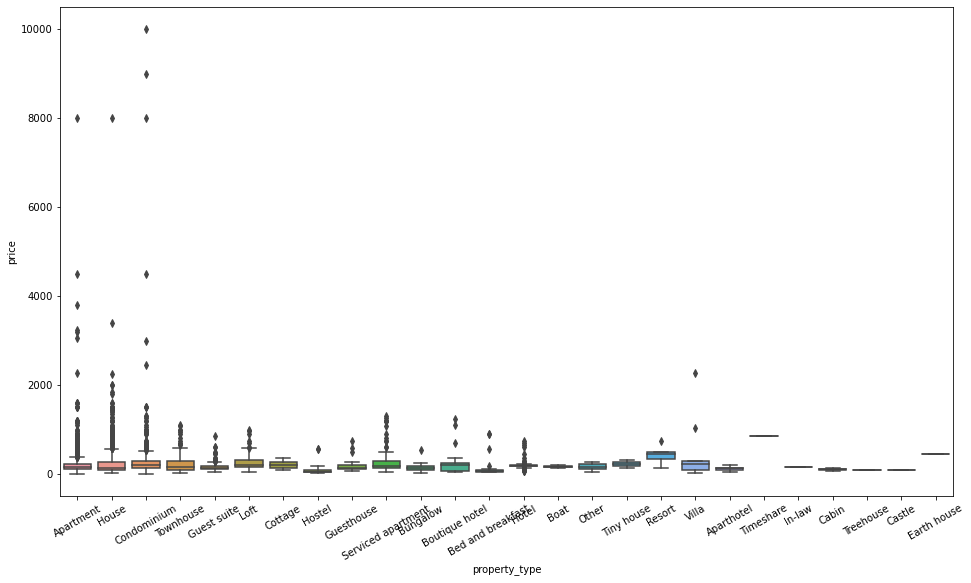

In [88]:
# To check the relation between property types and price

property_df = cleaned_df.select('property_type', 'price').toPandas()

fig, ax = plt.subplots(figsize=(16,9))
plt.xticks(rotation=30)

sns.boxplot(x='property_type', y='price', data=property_df, ax=ax)

In [89]:
cleaned_df = cleaned_df.drop('property_type')

In [91]:
# Null value check
null_dict = dict()

for col in cleaned_df.columns:
    null_dict[col] = cleaned_df.select(col).where(F.col(col).isNull()).count()
    
null_dict

{'summary': 200,
 'space': 1075,
 'description': 21,
 'neighborhood_overview': 1902,
 'transit': 2020,
 'access': 2386,
 'house_rules': 1922,
 'host_since': 0,
 'host_response_time': 0,
 'host_response_rate': 725,
 'host_is_superhost': 0,
 'host_neighbourhood': 642,
 'host_total_listings_count': 0,
 'host_verifications': 0,
 'host_has_profile_pic': 0,
 'host_identity_verified': 0,
 'neighbourhood_cleansed': 0,
 'zipcode': 205,
 'room_type': 0,
 'accommodates': 0,
 'bathrooms': 21,
 'bedrooms': 2,
 'beds': 7,
 'amenities': 0,
 'price': 0,
 'security_deposit': 1469,
 'cleaning_fee': 802,
 'guests_included': 0,
 'extra_people': 0,
 'number_of_reviews': 0,
 'number_of_reviews_ltm': 0,
 'review_scores_rating': 1421,
 'review_scores_accuracy': 1425,
 'review_scores_cleanliness': 1424,
 'review_scores_checkin': 1427,
 'review_scores_communication': 1423,
 'review_scores_location': 1427,
 'review_scores_value': 1428,
 'license': 2550,
 'instant_bookable': 0,
 'cancellation_policy': 0,
 'requir

In [92]:
'''
Parquet is a columnar format that is supported by many other data processing
systems. Spark SQL provides support for both reading and writing Parquet files that automatically
preseves the schema of the original data (spark.apache.org)
'''

cleaned_df.write.format('parquet') \
    .mode('overwrite') \
    .option('compression', 'snappy')\
    .save('data/sf-airbnb/parquet')